SGD optimizer (Pytorch)

Epoch  1, Loss: 17.3138
Epoch  2, Loss: 8.5037
Epoch  3, Loss: 3.9866
Epoch  4, Loss: 1.9537
Epoch  5, Loss: 0.9289
Epoch  6, Loss: 0.4699
Epoch  7, Loss: 0.2344
Epoch  8, Loss: 0.1335
Epoch  9, Loss: 0.0680
Epoch 10, Loss: 0.0433
Epoch 11, Loss: 0.0313
Epoch 12, Loss: 0.0254
Epoch 13, Loss: 0.0223
Epoch 14, Loss: 0.0228
Epoch 15, Loss: 0.0202
Epoch 16, Loss: 0.0212
Epoch 17, Loss: 0.0194
Epoch 18, Loss: 0.0191
Epoch 19, Loss: 0.0189
Epoch 20, Loss: 0.0186


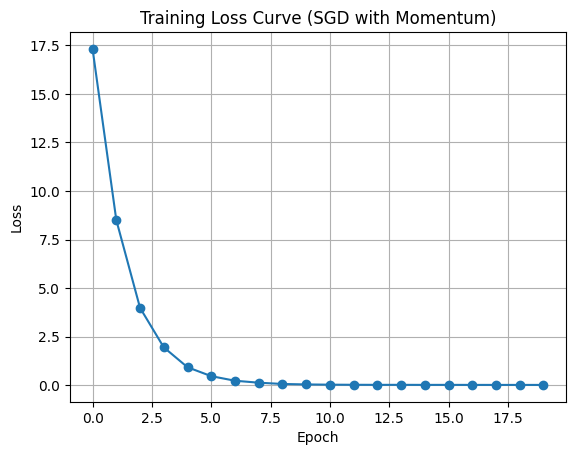

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Step 1: Sample training data (simple linear relation)
x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float32)
y_train = torch.tensor([[3.0], [5.0], [7.0], [9.0]], dtype=torch.float32)
# True function: y = 2x + 1

# Step 2: Wrap in Dataset and DataLoader
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Step 3: Define model
model = nn.Linear(1, 1)  # 1 input feature, 1 output

# Step 4: Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Step 5: Train the model
epochs = 20
loss_history = []

for epoch in range(epochs):
    epoch_loss = 0.0
    for x_batch, y_batch in dataloader:
        preds = model(x_batch)         # Forward pass
        loss = criterion(preds, y_batch)

        optimizer.zero_grad()          # Reset gradients
        loss.backward()                # Backward pass
        optimizer.step()               # Update weights

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(dataloader)
    loss_history.append(avg_loss)
    print(f"Epoch {epoch+1:2d}, Loss: {avg_loss:.4f}")

# Step 6: Plot loss vs. epochs
plt.plot(loss_history, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve (SGD with Momentum)")
plt.grid(True)
plt.show()


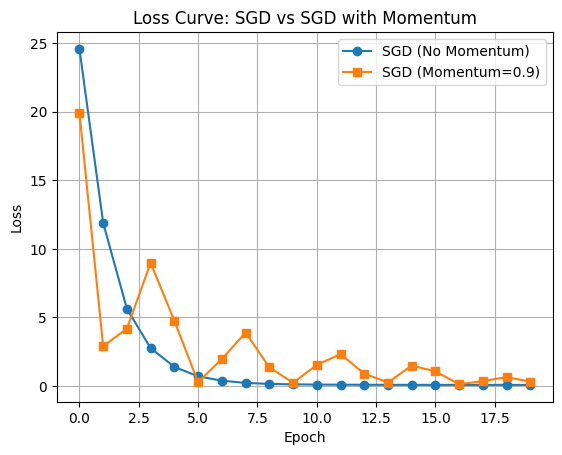

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Sample training data (y = 2x + 1)
x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float32)
y_train = torch.tensor([[3.0], [5.0], [7.0], [9.0]], dtype=torch.float32)

# Wrap in Dataset and DataLoader
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Function to train a model and return the loss history
def train_model(use_momentum=False, momentum_val=0.0):
    model = nn.Linear(1, 1)
    criterion = nn.MSELoss()
    if use_momentum:
        optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=momentum_val)
    else:
        optimizer = optim.SGD(model.parameters(), lr=0.01)

    loss_history = []
    epochs = 20

    for epoch in range(epochs):
        epoch_loss = 0.0
        for x_batch, y_batch in dataloader:
            preds = model(x_batch)
            loss = criterion(preds, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
        avg_loss = epoch_loss / len(dataloader)
        loss_history.append(avg_loss)
    
    return loss_history

# Train both models
loss_no_momentum = train_model(use_momentum=False)
loss_with_momentum = train_model(use_momentum=True, momentum_val=0.9)

# Plotting both loss curves
plt.plot(loss_no_momentum, label="SGD (No Momentum)", marker='o')
plt.plot(loss_with_momentum, label="SGD (Momentum=0.9)", marker='s')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve: SGD vs SGD with Momentum")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
nn.MSELoss?


Init signature: nn.MSELoss(size_average=None, reduce=None, reduction: str = 'mean') -> None
Docstring:     
Creates a criterion that measures the mean squared error (squared L2 norm) between
each element in the input :math:`x` and target :math:`y`.

The unreduced (i.e. with :attr:`reduction` set to ``'none'``) loss can be described as:

.. math::
    \ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
    l_n = \left( x_n - y_n \right)^2,

where :math:`N` is the batch size. If :attr:`reduction` is not ``'none'``
(default ``'mean'``), then:

.. math::
    \ell(x, y) =
    \begin{cases}
        \operatorname{mean}(L), &  \text{if reduction} = \text{`mean';}\\
        \operatorname{sum}(L),  &  \text{if reduction} = \text{`sum'.}
    \end{cases}

:math:`x` and :math:`y` are tensors of arbitrary shapes with a total
of :math:`N` elements each.

The mean operation still operates over all the elements, and divides by :math:`N`.

The division by :math:`N` can be avoided if one sets ``reduction = 's

In [3]:
optim.SGD?

Init signature:
optim.SGD(
    params: Union[Iterable[torch.Tensor], Iterable[Dict[str, Any]], Iterable[Tuple[str, torch.Tensor]]],
    lr: Union[float, torch.Tensor] = 0.001,
    momentum: float = 0,
    dampening: float = 0,
    weight_decay: float = 0,
    nesterov: bool = False,
    *,
    maximize: bool = False,
    foreach: Optional[bool] = None,
    differentiable: bool = False,
    fused: Optional[bool] = None,
)
Docstring:     
Implements stochastic gradient descent (optionally with momentum).

.. math::
   \begin{aligned}
        &\rule{110mm}{0.4pt}                                                                 \\
        &\textbf{input}      : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: f(\theta)
            \text{ (objective)}, \: \lambda \text{ (weight decay)},                          \\
        &\hspace{13mm} \:\mu \text{ (momentum)}, \:\tau \text{ (dampening)},
        \:\textit{ nesterov,}\:\textit{ maximize}                                     \\[-1.ex]
  

ADAM

Epoch 20: Loss = 0.3701
Epoch 40: Loss = 0.7088
Epoch 60: Loss = 0.2780
Epoch 80: Loss = 0.1617
Epoch 100: Loss = 0.1121


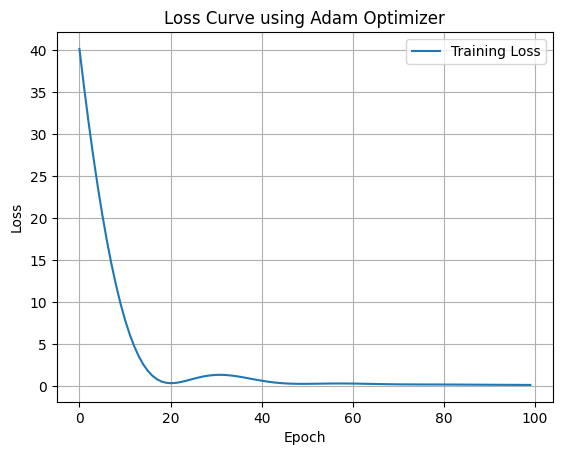

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. Training data: y = 2x + 1
x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y_train = torch.tensor([[3.0], [5.0], [7.0], [9.0]])

# 2. Define model
model = nn.Linear(1, 1)

# 3. Loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# 4. Store loss per epoch for plotting
loss_history = []

# 5. Training loop
for epoch in range(100):
    optimizer.zero_grad()
    predictions = model(x_train)
    loss = loss_fn(predictions, y_train)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

# 6. Plot loss vs epochs
plt.plot(loss_history, label='Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve using Adam Optimizer")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
optim.Adam?

Init signature:
optim.Adam(
    params: Union[Iterable[torch.Tensor], Iterable[Dict[str, Any]], Iterable[Tuple[str, torch.Tensor]]],
    lr: Union[float, torch.Tensor] = 0.001,
    betas: Tuple[Union[float, torch.Tensor], Union[float, torch.Tensor]] = (0.9, 0.999),
    eps: float = 1e-08,
    weight_decay: float = 0,
    amsgrad: bool = False,
    *,
    foreach: Optional[bool] = None,
    maximize: bool = False,
    capturable: bool = False,
    differentiable: bool = False,
    fused: Optional[bool] = None,
)
Docstring:     
Implements Adam algorithm.

.. math::
   \begin{aligned}
        &\rule{110mm}{0.4pt}                                                                 \\
        &\textbf{input}      : \gamma \text{ (lr)}, \beta_1, \beta_2
            \text{ (betas)},\theta_0 \text{ (params)},f(\theta) \text{ (objective)}          \\
        &\hspace{13mm}      \lambda \text{ (weight decay)},  \: \textit{amsgrad},
            \:\textit{maximize},  \: \epsilon \text{ (epsilon)}    